# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 500)

# Import Data

In [2]:
fgtrain = pd.read_csv('E:/Downlload/DataTrain.csv')
fgtrain

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
fgtest  = pd.read_excel('E:\Downlload\Test_set.xlsx')
fgtest

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [8]:
fgtrain.shape

(10683, 11)

In [9]:
fgtest.shape

(2671, 10)

# Data Preprocessing

### (1)Checking Dimensions and types

In [4]:
fgtrain.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [11]:
fgtest.count()

Airline            2671
Date_of_Journey    2671
Source             2671
Destination        2671
Route              2671
Dep_Time           2671
Arrival_Time       2671
Duration           2671
Total_Stops        2671
Additional_Info    2671
dtype: int64

In [12]:
fgtrain.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [13]:
fgtest.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

###  (2)Concat Train  AND Test Data

In [5]:
fg = fgtrain.append(fgtest, sort = False)

In [6]:
fg

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


### (3)Cheking Null Values

In [16]:
fg.isna().sum().sum()

2673

In [17]:
fg.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

### (3)String Processing

In [7]:
fg['Date'] = fg['Date_of_Journey'].str.split('/').str[0]

In [8]:
fg['Date'] = fg['Date'].astype(int)

In [9]:
fg['Month'] = fg['Date_of_Journey'].str.split('/').str[1]

In [10]:
fg['Month']=fg['Month'].astype(int)

In [11]:
fg['Year'] = fg['Date_of_Journey'].str.split('/').str[2]

In [12]:
fg['Year'] =fg['Year'].astype(int)

In [13]:
fg = fg.drop(['Date_of_Journey'],axis = 1)

In [14]:
fg.count() 

Airline            13354
Source             13354
Destination        13354
Route              13353
Dep_Time           13354
Arrival_Time       13354
Duration           13354
Total_Stops        13353
Additional_Info    13354
Price              10683
Date               13354
Month              13354
Year               13354
dtype: int64

In [15]:
fg.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [16]:
fg['Arrival_Time'] =fg['Arrival_Time'].str.split(' ').str[0]

In [17]:
fg['Arrival_Hour'] = fg['Arrival_Time'].str.split(':').str[1]

In [18]:
fg['Arrival_Hour'] = fg['Date'].astype(int)

In [19]:
fg['Arrival_Minute'] = fg['Arrival_Time'].str.split(':').str[2]

In [20]:
fg['Arrival_Minute'] = fg['Date'].astype(int)

In [21]:
fg = fg.drop(['Arrival_Time'],axis=1)

In [22]:
fg

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,24,24
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,1,1
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,9,9
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,12,12
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,23h 55m,1 stop,No info,NaN,6,6,2019,6,6
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,2h 35m,non-stop,No info,NaN,27,3,2019,27,27
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,6h 35m,1 stop,No info,NaN,6,3,2019,6,6
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,15h 15m,1 stop,No info,NaN,6,3,2019,6,6


### (4)Checking Null values in variable

In [23]:
fg['Total_Stops'].isna().sum()

1

In [24]:
fg[fg['Total_Stops'].isna() == True]

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute
9039,Air India,Delhi,Cochin,NaN,09:45,23h 40m,NaN,No info,7480.0,6,5,2019,6,6


#### [ Filling Null Values ]

In [25]:
fg['Total_Stops'] = fg['Total_Stops'].fillna('1 stop')

In [26]:
fg['Total_Stops'].isna().sum()

0

#### [ Replacing [non-stop]  by  [0-stop] ]

In [27]:
fg['Total_Stops'] = fg['Total_Stops'].replace('non-stop','0 stop')

#### [  String  Seperation ]

In [28]:
fg['Total_Stops'] = fg['Total_Stops'].str.split(' ').str[0]

In [29]:
fg['Total_Stops'] =fg['Total_Stops'].astype(int)

#### [ Splitting Minutes From Hours ]

In [30]:
fg['Departure_Minute'] = fg['Dep_Time'].str.split(':').str[1]

####  [ Splitting Hours From Minutes ]

In [31]:
fg['Departure_Hour'] = fg['Dep_Time'].str.split(':').str[0]

In [32]:
fg['Departure_Hour'] = fg['Departure_Hour'].astype(int)

In [33]:
fg['Departure_Minute'] = fg['Departure_Minute'].astype(int)

In [34]:
fg = fg.drop(['Dep_Time'],axis =1)

#### [ Splitting Categorical Values ]

In [35]:
fg['Route_1']= fg['Route'].str.split('→ ').str[0]

In [36]:
fg['Route_2']= fg['Route'].str.split('→ ').str[1]

In [37]:
fg['Route_3']= fg['Route'].str.split('→ ').str[2]

In [38]:
fg['Route_4']= fg['Route'].str.split('→ ').str[3]

In [39]:
fg['Route_5']= fg['Route'].str.split('→ ').str[4]

#### [ Fill NA With Mean Vlaue ]

In [40]:
fg['Price'].fillna((fg['Price'].mean()),inplace=True)

In [41]:
fg['Route_1'].fillna("None",inplace=True)

In [42]:
fg['Route_2'].fillna("None",inplace=True)

In [43]:
fg['Route_3'].fillna("None",inplace=True)

In [44]:
fg['Route_4'].fillna("None",inplace=True)

In [45]:
fg = fg.drop(['Route'],axis=1)

In [46]:
fg = fg.drop(['Duration'],axis=1)

#### [ Encoding Categorical Value ]

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
encoder=LabelEncoder()

In [49]:
fg["Airline"]=encoder.fit_transform(fg['Airline'])

In [50]:
fg["Source"]=encoder.fit_transform(fg['Source'])

In [51]:
fg["Destination"]=encoder.fit_transform(fg['Destination'])

In [52]:
fg["Additional_Info"]=encoder.fit_transform(fg['Additional_Info'])

In [53]:
fg["Route_1"]=encoder.fit_transform(fg['Route_1'])

In [54]:
fg["Route_2"]=encoder.fit_transform(fg['Route_2'])

In [55]:
fg["Route_3"]=encoder.fit_transform(fg['Route_3'])

In [56]:
fg["Route_4"]=encoder.fit_transform(fg['Route_4'])

In [57]:
fg["Route_5"] = fg["Route_5"].astype(str)

In [58]:
fg["Route_5"]=encoder.fit_transform(fg['Route_5'])

In [59]:
fg

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Minute,Departure_Hour,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,8,3897.000000,24,3,2019,24,24,20,22,19,31,21,8,4
1,1,3,0,2,8,7662.000000,1,5,2019,1,1,50,5,87,31,21,8,4
2,4,2,1,2,8,13882.000000,9,6,2019,9,9,25,9,122,31,21,8,4
3,3,3,0,1,8,6218.000000,12,5,2019,12,12,5,18,94,31,21,8,4
4,3,0,5,1,8,13302.000000,1,3,2019,1,1,50,16,30,31,21,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1,8,9087.064121,6,6,2019,6,6,30,20,61,14,3,8,4
2667,3,3,0,0,8,9087.064121,27,3,2019,27,27,20,14,61,5,21,8,4
2668,4,2,1,1,8,9087.064121,6,3,2019,6,6,50,21,100,7,5,8,4
2669,1,2,1,1,8,9087.064121,6,3,2019,6,6,0,4,100,7,5,8,4


# Data Visualization

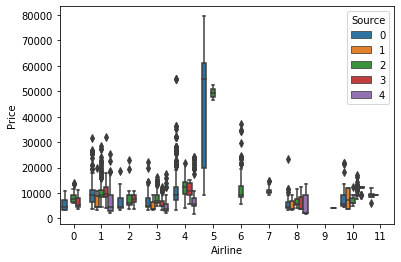

In [68]:
sns.boxplot(x='Airline',y='Price',hue='Source',data=fg)

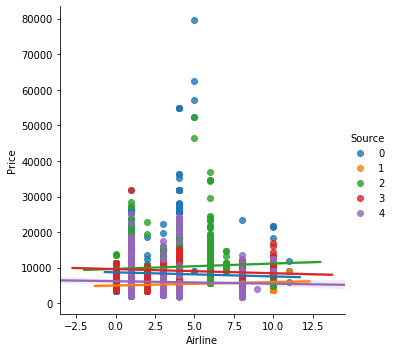

In [69]:
sns.lmplot(x='Airline',y='Price',hue='Source',data=fg)

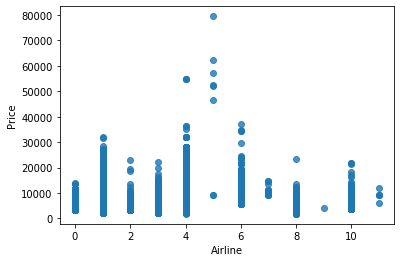

In [70]:
sns.regplot(x=fg['Airline'], y=fg['Price'], fit_reg=False)

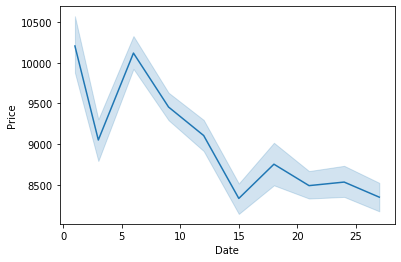

In [71]:
sns.lineplot(x='Date',y='Price',data=fg)

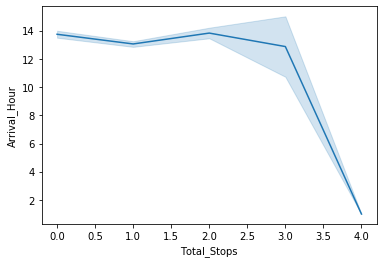

In [72]:
sns.lineplot(x='Total_Stops',y='Arrival_Hour',data=fg)

In [ ]:
sns.pairplot(fg,hue='Source')

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


#  Seperate Dependent and Indepedent Variables

In [60]:
x=fg.drop(['Price'],axis=1)

In [61]:
y=fg.Price

In [62]:
x

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Minute,Departure_Hour,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,8,24,3,2019,24,24,20,22,19,31,21,8,4
1,1,3,0,2,8,1,5,2019,1,1,50,5,87,31,21,8,4
2,4,2,1,2,8,9,6,2019,9,9,25,9,122,31,21,8,4
3,3,3,0,1,8,12,5,2019,12,12,5,18,94,31,21,8,4
4,3,0,5,1,8,1,3,2019,1,1,50,16,30,31,21,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1,8,6,6,2019,6,6,30,20,61,14,3,8,4
2667,3,3,0,0,8,27,3,2019,27,27,20,14,61,5,21,8,4
2668,4,2,1,1,8,6,3,2019,6,6,50,21,100,7,5,8,4
2669,1,2,1,1,8,6,3,2019,6,6,0,4,100,7,5,8,4


# Train Test Split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [75]:
x_train.shape

(9347, 17)

In [76]:
x_test.shape

(4007, 17)

In [77]:
y_train.shape

(9347,)

In [78]:
y_test.shape

(4007,)

# Feature selection

In [65]:
from sklearn.linear_model import Lasso

In [66]:
from sklearn.feature_selection import SelectFromModel

In [67]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [68]:
model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [69]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True])

In [70]:
selected_features=x_train.columns[(model.get_support())]

In [71]:
x_train=x_train.drop(['Year'],axis=1)

In [72]:
x_test=x_test.drop(['Year'],axis=1)

In [73]:
x_train=x_train.drop(['Arrival_Minute'],axis=1)

In [74]:
x_test=x_test.drop(['Arrival_Minute'],axis=1)

In [75]:
x_train

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Arrival_Hour,Departure_Minute,Departure_Hour,Route_1,Route_2,Route_3,Route_4,Route_5
6167,4,4,3,0,8,18,6,18,55,2,50,31,21,8,4
53,4,0,5,1,8,18,3,18,45,5,0,7,7,8,4
10134,3,4,3,0,8,24,6,24,20,21,50,31,21,8,4
7633,2,0,5,0,8,15,3,15,55,20,19,31,21,8,4
4962,3,2,1,1,8,9,5,9,50,6,115,31,21,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,4,3,0,1,5,1,5,1,5,14,61,7,3,8,4
5191,4,3,0,1,5,9,5,9,5,14,69,31,21,8,4
5390,6,2,1,1,8,15,5,15,50,12,108,31,21,8,4
860,3,0,5,0,8,3,3,3,40,0,19,31,21,8,4


# Model Building

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
regressor = RandomForestRegressor(n_estimators=100,random_state=42)

In [91]:
reg=regressor.fit(x_train,y_train)

# Prediction

In [92]:
y_pred=regressor.predict(x_test)

In [93]:
from sklearn import metrics
rf_RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rf_RMSE

1540.159472287247

# Accuracy

In [94]:
from sklearn.metrics import r2_score
rf_r2_score = r2_score(y_test,y_pred)
rf_r2_score

0.8678479756551529

In [101]:
import pickle
pickle.dump(regressor,open('rf_model.pkl','wb'))

# Randomized Cross Validation

In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

In [97]:
max_features = ['auto', 'sqrt']

In [98]:
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

In [99]:
min_samples_split = [2, 5, 10, 15, 100]

In [100]:
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(x_train,y_train)

In [ ]:
y_predRF=rf_random.predict(x_test)

In [ ]:
random_best= rf_random.best_estimator_.predict(x_train)

In [ ]:
errors1 = abs(random_best - y_train)

In [ ]:
mape = np.mean(100 * (errors1 / y_train))

In [ ]:
rf_Score = 100 - mape    

In [ ]:
rf_Score

# XGboost Model

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor(objective ='reg:linear', colsample_bytree = 0.8, learning_rate = 0.5, max_depth = 6, 
                          alpha = 10, n_estimators = 1000)

In [ ]:
xgb

In [ ]:
xgb.fit(x_train,y_train)

In [ ]:
preds = xgb.predict(x_test)

In [ ]:
preds

In [ ]:
print(y_test, preds, x_test, xgb)

In [ ]:
from sklearn import metrics

In [ ]:
print('Root Mean SQUARED ERROR   =  ',np.sqrt(metrics.mean_squared_error(y_test,preds)))

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, preds)

# Grid Search Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = { 
    'n_estimators': [100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [7],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_XGB = GridSearchCV(estimator=xgb, param_grid=param_grid, cv= 10)

In [ ]:
CV_XGB.fit(x_train, y_train)

In [ ]:
CV_XGB.best_params_

In [ ]:
XGB1=XGBRegressor(random_state=40, max_features='auto', n_estimators= 1300, max_depth=15, criterion='gini')

In [ ]:
XGB1.fit(x_train, y_train)

In [ ]:
print(CV_XGB.best_score_)

In [ ]:
print(CV_XGB.best_params_)

In [81]:
u"\u20B9"

'₹'